# Loading Preprocessed Data

In [2]:
import pandas as pd

df = pd.read_csv('cleaned_phishing.csv')
df

,NumDots,SubdomainLevel,PathLevel,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,0.412023,0.550071,0.912273,-0.585299,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,-0.341036,...,-0.717101,-0.182404,5.647543,0.174982,-0.024634,0.727558,0.396934,-1.552665,0.763980,1
1,0.412023,0.550071,-0.161179,-0.585299,-0.254528,-0.017323,-0.115212,1.504391,-0.118608,1.146256,...,-0.717101,-0.182404,-0.177068,0.174982,-1.244154,0.727558,0.396934,1.093772,0.763980,1
2,0.412023,0.550071,-0.697905,-0.585299,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,-0.341036,...,-0.717101,-0.182404,-0.177068,0.174982,-0.024634,-1.522505,0.396934,-1.552665,-0.349856,1
3,0.412023,0.550071,1.448999,-0.263353,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,-0.341036,...,-0.717101,-0.182404,-0.177068,0.174982,-1.244154,0.727558,0.396934,1.093772,-1.463692,1
4,0.412023,-0.781175,0.375547,-0.585299,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,-0.341036,...,1.394504,-0.182404,-0.177068,0.174982,1.194885,-1.522505,-1.522477,-1.552665,-1.463692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.412023,0.550071,-1.234631,-0.585299,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,1.146256,...,-0.717101,-0.182404,-0.177068,0.174982,1.194885,-1.522505,0.396934,-0.229446,0.763980,0
9996,-0.330495,0.550071,0.375547,-0.263353,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,-0.341036,...,1.394504,-0.182404,-0.177068,0.174982,-0.024634,-0.397474,0.396934,-0.229446,0.763980,0
9997,-0.330495,0.550071,0.375547,-0.585299,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,-0.341036,...,-0.717101,-0.182404,-0.177068,0.174982,-0.024634,0.727558,0.396934,-0.229446,0.763980,0
9998,0.412023,0.550071,-1.234631,-0.585299,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,0.402610,...,1.394504,-0.182404,-0.177068,0.174982,1.194885,-0.397474,0.396934,-0.229446,0.763980,0


# Modelling

# Splitting data into Train and Test

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['CLASS_LABEL'])
y = df['CLASS_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest - SKLearn

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

parameters_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_rf, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [5]:
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

y_pred_rf = best_rf.predict(X_test)

In [6]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Accuracy (Random Forest):", accuracy_rf)
print("F1 Score (Random Forest):", f1_rf)

Accuracy (Random Forest): 0.9833333333333333
F1 Score (Random Forest): 0.9833343115845846


In [7]:
classif_report_rf = classification_report(y_test, y_pred_rf)
print('Classification Report (Random Forest):\n', classif_report_rf)

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1463
           1       0.99      0.98      0.98      1537

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



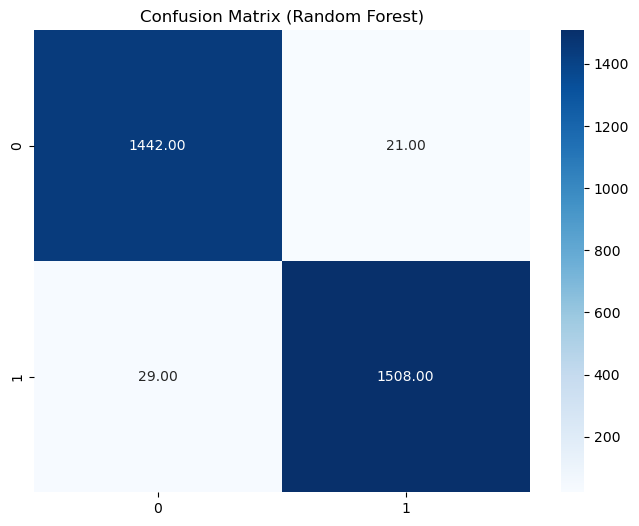

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf, cmap='Blues',fmt='.2f',annot=True)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# XGBoost

In [11]:
import xgboost as xgb

parameters_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
}

model_xgb = xgb.XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model_xgb, param_grid=parameters_xgb, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300}


In [12]:
best_xgb = xgb.XGBClassifier(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

y_pred_xgb = best_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print("Accuracy (XGBoost):", accuracy_xgb)
print("F1 Score (XGBoost):", f1_xgb)

Accuracy (XGBoost): 0.9836666666666667
F1 Score (XGBoost): 0.9836670534388577


In [21]:
classif_report_xgb = classification_report(y_test, y_pred_xgb)
print('Classification Report (XGBoost):\n', classif_report_xgb)

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1463
           1       0.99      0.98      0.98      1537

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



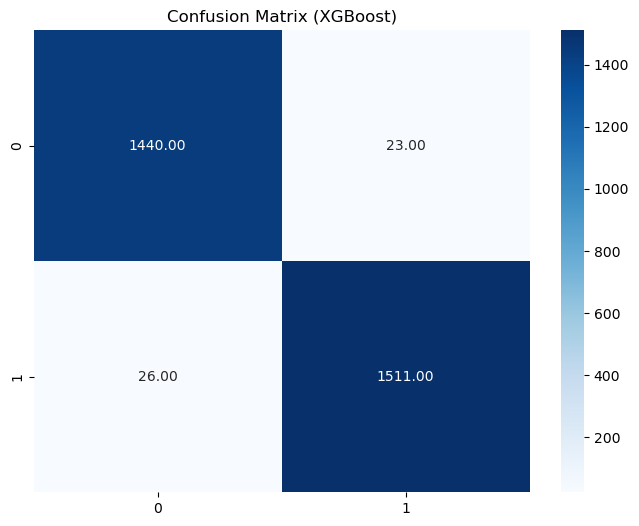

In [14]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_xgb, cmap='Blues',fmt='.2f',annot=True)
plt.title('Confusion Matrix (XGBoost)')
plt.show()

# Support Vector Machine (SVM)

In [15]:
from sklearn.svm import SVC

model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("Accuracy (SVM):", accuracy_svm)
print("F1 Score (SVM):", f1_svm)

Accuracy (SVM): 0.9596666666666667
F1 Score (SVM): 0.9596577171367213


In [16]:
print('Classification Report (SVM):\n', classification_report(y_test, y_pred_svm))

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1463
           1       0.95      0.97      0.96      1537

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



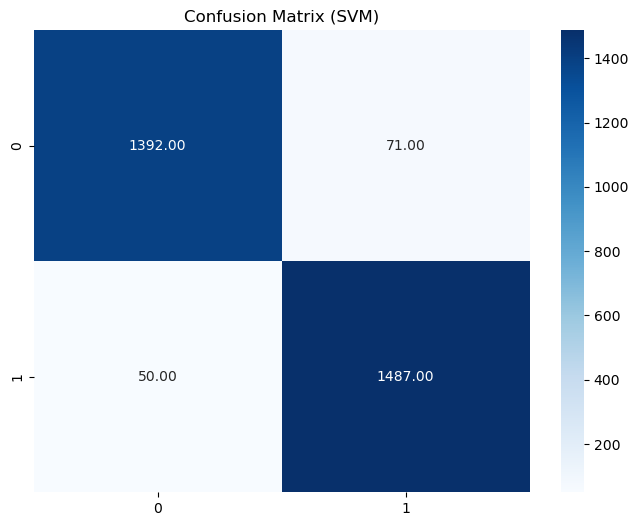

In [17]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_svm, cmap='Blues',fmt='.2f',annot=True)
plt.title('Confusion Matrix (SVM)')
plt.show()

# SVM - LIBSVM

In [18]:
from libsvm.svmutil import svm_train, svm_predict

X_libsvm = X_train.values.tolist()
X_test_libsvm = X_test.values.tolist()
y_libsvm = y_train.tolist()
y_test_libsvm = y_test.tolist()

model_libsvm = svm_train(y_libsvm, X_libsvm, '-s 0 -t 0 -c 1')

svm_labels, _, _ = svm_predict(y_test_libsvm, X_test_libsvm, model_libsvm)

accuracy_libsvm = accuracy_score(y_test_libsvm, svm_labels)
f1_libsvm = f1_score(y_test_libsvm, svm_labels, average='weighted')

print("Accuracy (LIBSVM):", accuracy_libsvm)
print("F1 Score (LIBSVM):", f1_libsvm)

C:\Users\Lenovo\anaconda3\Lib\site-packages\libsvm\svm.py:148: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit


Accuracy = 93.4667% (2804/3000) (classification)
Accuracy (LIBSVM): 0.9346666666666666
F1 Score (LIBSVM): 0.9346439905260959


In [19]:
print('Classification Report (LIBSVM):\n', classification_report(y_test_libsvm, svm_labels))

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1463
           1       0.93      0.95      0.94      1537

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



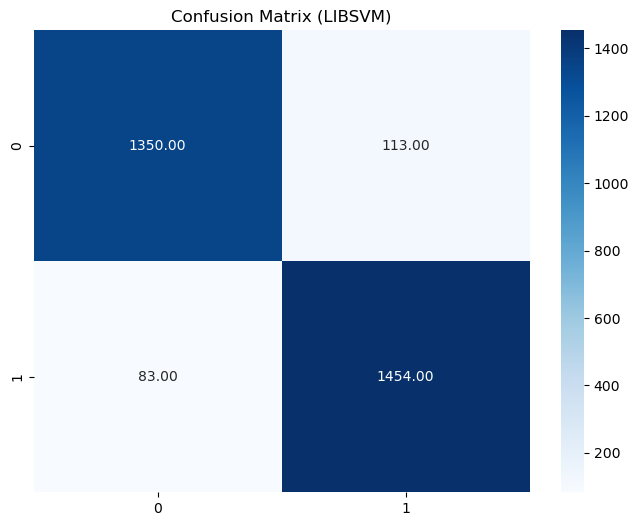

In [20]:
conf_matrix_libsvm = confusion_matrix(y_test_libsvm, svm_labels)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_libsvm, cmap='Blues',fmt='.2f',annot=True)
plt.title('Confusion Matrix (LIBSVM)')
plt.show()